<p style="text-align: right">
  <img src="../images/dtlogo.png" alt="Logo" width="200">
</p>

# 🚙 💻 05 - Wheel encoder based odometry (SOLUTIONS)

# 🚙 💻 Let's get started!

In this activity you will write a function that produces an estimate of the pose of the Duckiebot, given mesurements from the wheel encoders and an initial position:

In [4]:
x0 = y0 = 0 # meters
theta0 = 0 # radians

In [5]:
import numpy as np 
 
N_tot = 135 # total number of ticks per revolution
alpha = 2 * np.pi / N_tot # wheel rotation per tick in radians

print(f"The angular resolution of our encoders is: {np.rad2deg(alpha)} degrees")

The angular resolution of our encoders is: 2.6666666666666665 degrees


In [6]:
# Feel free to play with the numbers to get an idea of the expected outcome

ticks_left = 1
prev_tick_left = 0

ticks_right = 0
prev_tick_right = 0

In [7]:
# How much would the wheels rotate with the above tick measurements? 

delta_ticks_left = ticks_left-prev_tick_left # delta ticks of left wheel 
delta_ticks_right = ticks_right-prev_tick_right # delta ticks of right wheel 

rotation_wheel_left = alpha * delta_ticks_left # total rotation of left wheel 
rotation_wheel_right = alpha * delta_ticks_right # total rotation of right wheel 

print(f"The left wheel rotated: {np.rad2deg(rotation_wheel_left)} degrees")
print(f"The right wheel rotated: {np.rad2deg(rotation_wheel_right)} degrees")

The left wheel rotated: 2.6666666666666665 degrees
The right wheel rotated: 0.0 degrees


In [8]:
# What is the radius of your wheels? 
R = 0.0318 # insert value measured by ruler, in *meters*

In [9]:
# What is the distance travelled by each wheel?

d_left = R * rotation_wheel_left 
d_right = R * rotation_wheel_right

print(f"The left wheel travelled: {d_left} meters")
print(f"The right wheel rotated: {d_right} meters")

The left wheel travelled: 0.0014800392056911916 meters
The right wheel rotated: 0.0 meters


In [10]:
# How much has the robot travelled? 

d_A = (d_left + d_right)/2

print(f"The robot has travelled: {d_A} meters")

The robot has travelled: 0.0007400196028455958 meters


In [11]:
# What is the baseline length of your robot? 

baseline_wheel2wheel = 0.1 #  Distance between the center of the two wheels, expressed in meters 

In [14]:
# How much has the robot rotated? 

Delta_Theta = (d_right-d_left)/baseline_wheel2wheel # expressed in radians

print(f"The robot has rotated: {np.rad2deg(Delta_Theta)} degrees")

The robot has rotated: -0.8480000000000001 degrees


## Calculating the rotation of each wheel

In [8]:
# The function written in this cell will actually be ran on your robot (sim or real) and used for the next activities, as well as the homework exercise! 
# Put together the steps above and write your DeltaPhi function! 

# DO NOT CHANGE THE NAME OF THIS FUNCTION (nor the inputs and outputs) OR THINGS WILL BREAK

def DeltaPhi(encoder_msg, prev_ticks):
    """
        Args:
            encoder_msg: ROS encoder message (ENUM)
            prev_ticks: Previous tick count from the encoders (int)
        Return:
            rotation_wheel: Rotation of the wheel in radians (double)
            ticks: current number of ticks (int)
    """
    
    # Read the number of ticks
    
    ticks = encoder_msg.data

    # Evaluate the number of ticks since the last call 
    
    delta_ticks = ticks-prev_ticks    

    # Evaluate the wheel rotation

    N_tot = encoder_msg.resolution #total number of ticks per wheel revolution

    alpha = 2*np.pi/N_tot # rotation per tick in radians 

    delta_phi = alpha*delta_ticks # in radians
    
    #     DEBUGGING
    #     print(f"        DELTA TICKS  {encoder_msg.header.frame_id}")
    #     print(delta_ticks)

    return delta_phi, ticks

## Estimating the odometry

In [15]:
# The function written in this cell will actually be ran on your robot (sim or real). 
# Put together the steps above and write your odometry function! 

import numpy as np 

# DO NOT CHANGE THE NAME OF THIS FUNCTION OR THINGS WILL BREAK

def poseEstimation( R, # radius of wheel (assumed identical) - this is fixed in simulation, and will be imported from your saved calibration for the physical robot
                    baseline_wheel2wheel, # distance from wheel to wheel; 2L of the theory
                    x_prev, # previous x estimate - assume given
                    y_prev, # previous y estimate - assume given
                    theta_prev, # previous orientation estimate - assume given
                    delta_phi_left, # left wheel rotation (rad)
                    delta_phi_right): # right wheel rotation (rad)
    
    """
        Calculate the current Duckiebot pose using dead reckoning approach.

        Returns x,y,theta current estimates:
            x_curr, y_curr, theta_curr (:double: values)
    """
    
    # Define wheel radii [m]
    
    # r = 0 # make different than zero if you have reason to believe the wheels are of different sizes.
    R_left = R # * (1-r)
    R_right = R # * (1+r)
    
    # Define distance travelled by each wheel [m]
    
    d_left = R_left * delta_phi_left 
    d_right = R_right * delta_phi_right
    
    # Define distance travelled by the robot, in body frame [m]
    
    d_A = (d_left + d_right)/2
    
    # Define rotation of the robot [rad]
    
    Dtheta = (d_right - d_left)/baseline_wheel2wheel
    
    # Define distance travelled by the robot, in world frame [m]
    
    Dx = d_A * np.cos(theta_prev)
    Dy = d_A * np.sin(theta_prev)
    
    # Update pose estimate
    
    x_curr = x_prev + Dx
    y_curr = y_prev + Dy
    theta_curr = theta_prev + Dtheta

    return x_curr, y_curr, theta_curr

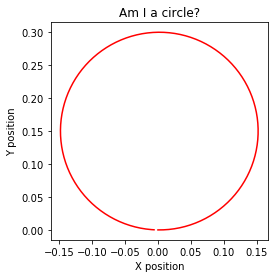

In [20]:
import os, sys
sys.path.append('../')
from unit_test import UnitTestOdometry

# This function has hardcoded values (bad practice!) to test the poseEstimate function above. 
# The test will be successful if you get a circle. Anything short of a circle.. probably best to go back and check. 

R = 0.0318 # for the sake of this unit test, keep these values, regardless of what you have measured.
baseline_wheel2wheel = 0.1

UnitTestOdometry(R, baseline_wheel2wheel, poseEstimation)
